In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [2]:
data = pd.read_csv("./marketing_campaign.csv", sep="\t")

print(f"The dataset has {data.shape[0]} columns and {data.shape[1]} features")
display(data.describe())
display(data.dtypes)
display(data.isna().sum())

The dataset has 2240 columns and 29 features


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [3]:
data = data.dropna(axis=0)

Since we only lack 24 values, what is around 1% of our data, i decided just to drop those values. Alternatevly i would fill them with mean value. We can see the distribution of this value is more or less normal, i had to remove one outlier for better visualisation

(array([  6.,  18.,  10.,  13.,  43.,  53.,  82.,  85.,  89., 101., 125.,
        114., 115., 105.,  99.,  95., 109., 101., 100., 123.,  98., 117.,
         79.,  89.,  89.,  62.,  36.,  22.,  18.,   5.,   2.,   3.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   4.,   2.]),
 array([  1730.  ,   4943.34,   8156.68,  11370.02,  14583.36,  17796.7 ,
         21010.04,  24223.38,  27436.72,  30650.06,  33863.4 ,  37076.74,
         40290.08,  43503.42,  46716.76,  49930.1 ,  53143.44,  56356.78,
         59570.12,  62783.46,  65996.8 ,  69210.14,  72423.48,  75636.82,
         78850.16,  82063.5 ,  85276.84,  88490.18,  91703.52,  94916.86,
         98130.2 , 101343.54, 104556.88, 107770.22, 110983.56, 114196.9 ,
        117410.24, 120623.58, 123836.92, 127050.26, 130263.6 , 133476.94,
        136690.28, 139903.62, 143116.96, 146330.3 , 149543.64, 152756.98,
        155970.32, 159183.66, 162397.  ]),
 <BarContainer object o

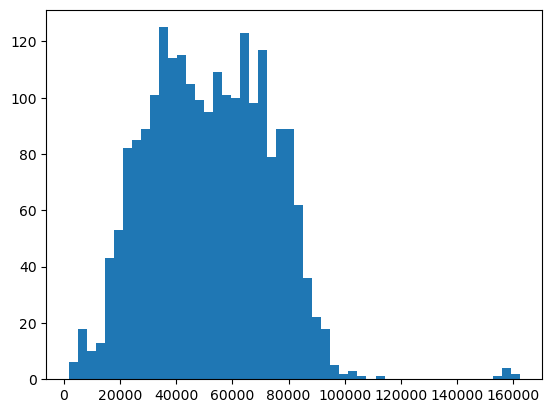

In [4]:
plt.hist(data["Income"].sort_values().iloc[:-1], bins=50)

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [5]:
data.select_dtypes(include=["object"]).describe()

,Education,Marital_Status,Dt_Customer
count,2216,2216,2216
unique,5,8,662
top,Graduation,Married,31-08-2012
freq,1116,857,12


Here we can one hot encode 2 of our categorical columns. I decided one hot encoding rather than label encodeing, since i couldnt find continuity in those columns logic. And i think in this case one hot encoding would represent this value better for clastering

In [6]:
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], dtype="int")

As for data value i think i will enrigh the data with different features based on that time data that we have.

In [7]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")

data['Year'] = data['Dt_Customer'].dt.year
data['Month'] = data['Dt_Customer'].dt.month
data['Day'] = data['Dt_Customer'].dt.day
data['DayOfWeek'] = data['Dt_Customer'].dt.dayofweek
data['DayOfYear'] = data['Dt_Customer'].dt.dayofyear
data['WeekOfYear'] = data['Dt_Customer'].dt.isocalendar().week
data['Quarter'] = data['Dt_Customer'].dt.quarter

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [28]:
X = data.drop(columns=["Dt_Customer", "ID"])

In [29]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)

In [30]:
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.61


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [31]:
from itertools import combinations
from sklearn import metrics

def find_pairs(data, columns, labels):
    # Generate all unique pairs of columns
    all_pairs = list(combinations(columns, 2))
    
    # Compute silhouette scores for each pair
    results = [
        {
            "score": metrics.silhouette_score(data[list(pair)], labels, metric='euclidean'),
            "pair": pair
        }
        for pair in all_pairs
    ]
    
    return results

# Assuming X is your data and labels are your clustering labels
pairs_metrics = find_pairs(X, X.columns, labels)


In [32]:
sorted_pairs = sorted(pairs_metrics, key=lambda x: x["score"], reverse=True)

sorted_pairs[:15]

[{'score': 0.6065631804943443, 'pair': ('Income', 'Z_CostContact')},
 {'score': 0.6065631804943443, 'pair': ('Income', 'Z_Revenue')},
 {'score': 0.6065631804327986, 'pair': ('Income', 'Marital_Status_Absurd')},
 {'score': 0.6065631804129742, 'pair': ('Income', 'Marital_Status_YOLO')},
 {'score': 0.6065631803620677, 'pair': ('Income', 'Marital_Status_Alone')},
 {'score': 0.6065631803415058, 'pair': ('Income', 'Complain')},
 {'score': 0.6065631801991329, 'pair': ('Income', 'AcceptedCmp2')},
 {'score': 0.6065631800824505, 'pair': ('Income', 'Education_Basic')},
 {'score': 0.6065631799206518, 'pair': ('Income', 'AcceptedCmp5')},
 {'score': 0.606563179880295, 'pair': ('Income', 'Marital_Status_Widow')},
 {'score': 0.6065631798148426, 'pair': ('Income', 'AcceptedCmp1')},
 {'score': 0.6065631793158803, 'pair': ('Income', 'AcceptedCmp3')},
 {'score': 0.6065631793069172, 'pair': ('Income', 'AcceptedCmp4')},
 {'score': 0.606563178778575, 'pair': ('Income', 'Education_2n Cycle')},
 {'score': 0.60

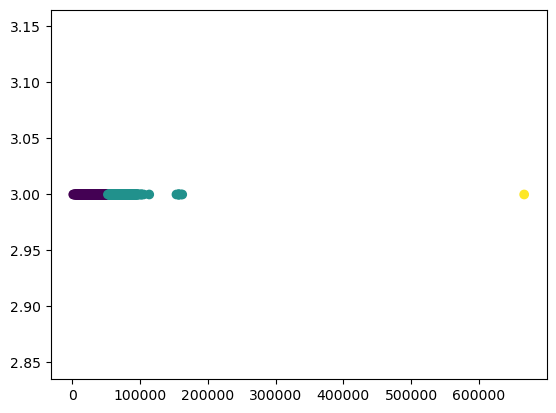

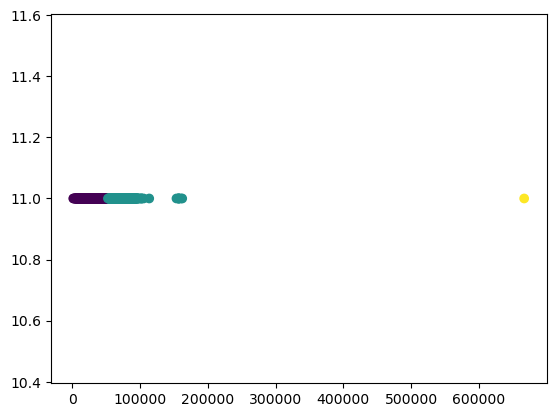

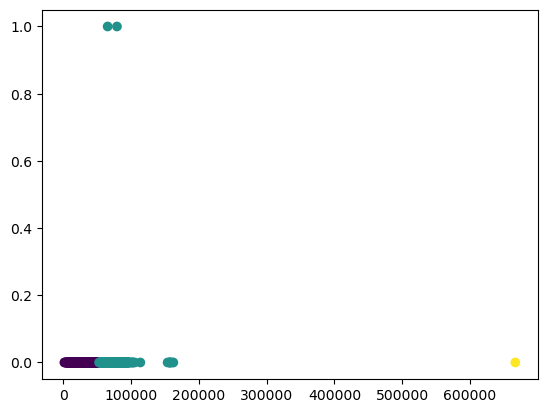

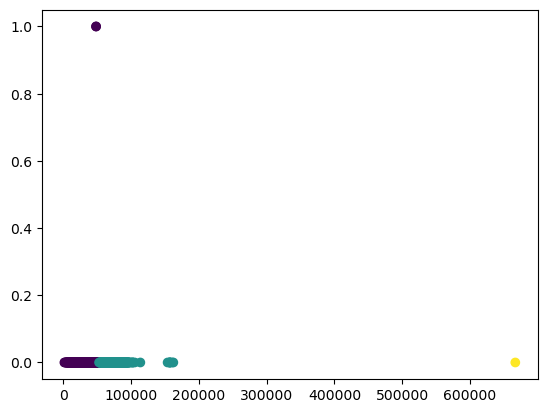

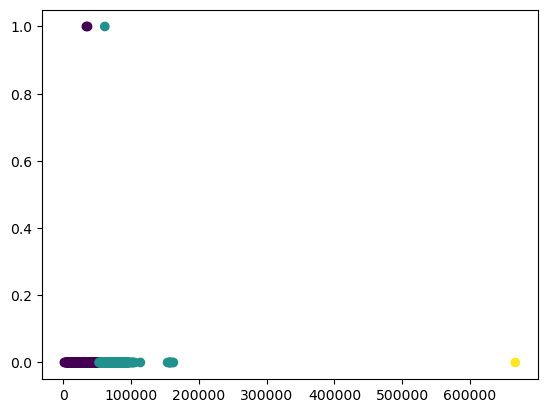

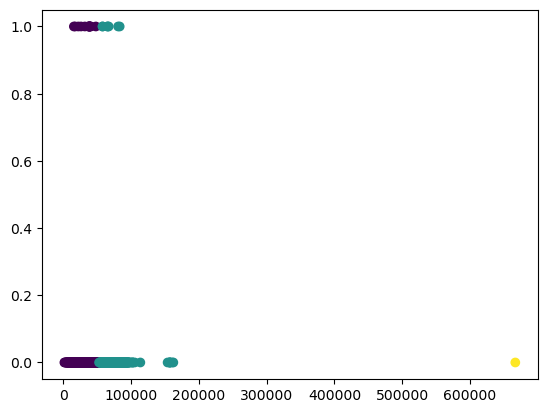

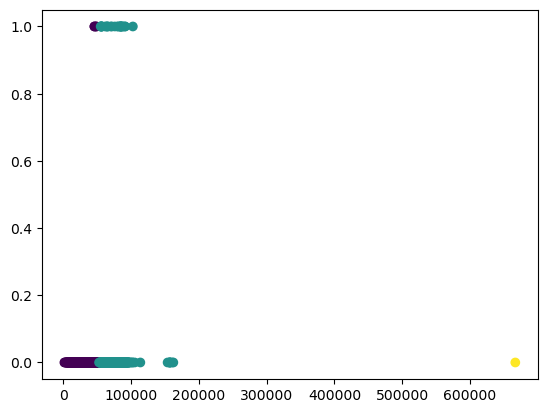

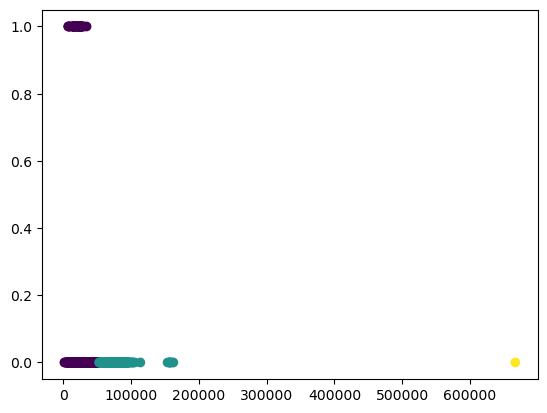

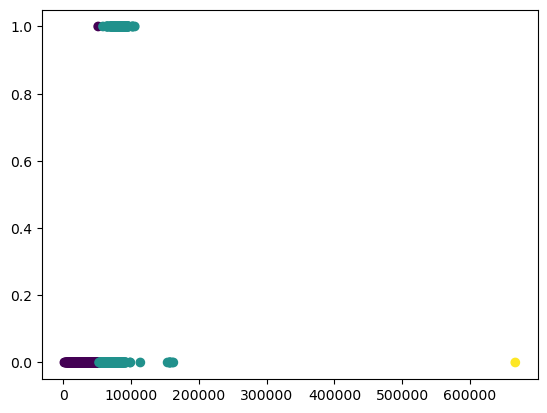

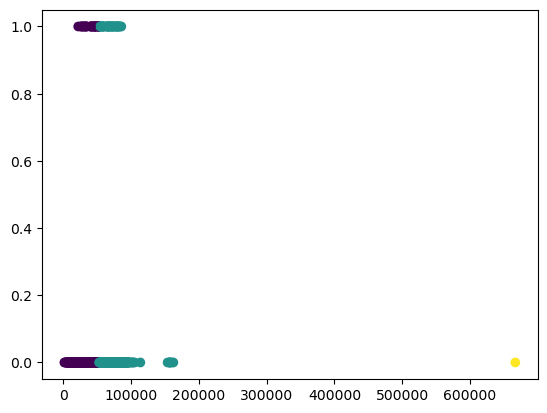

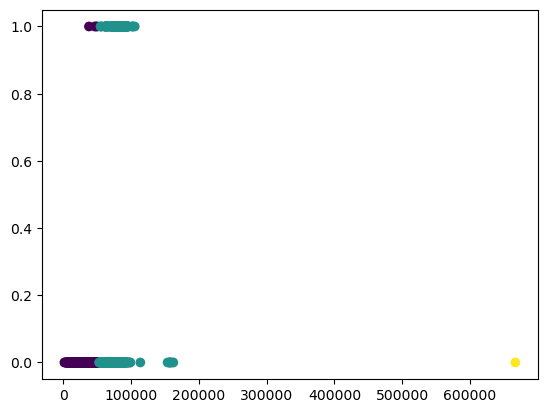

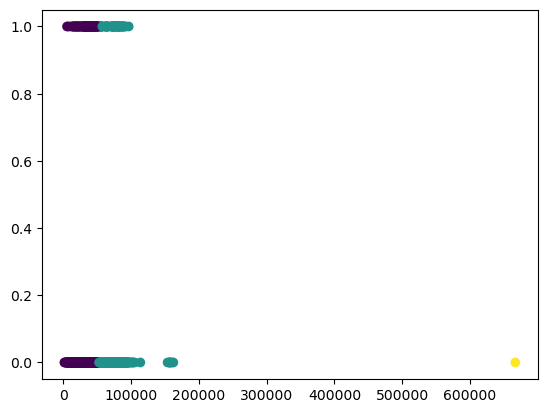

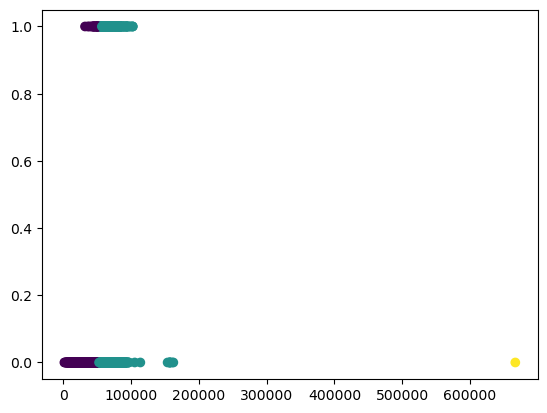

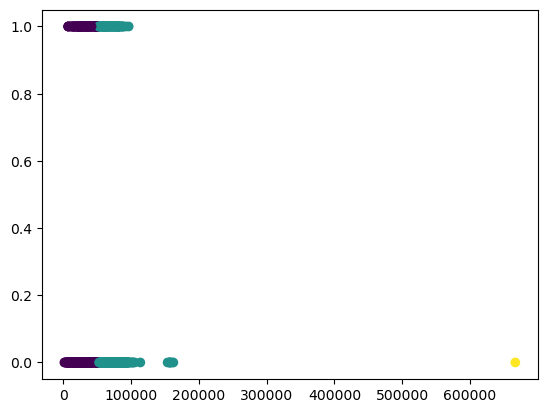

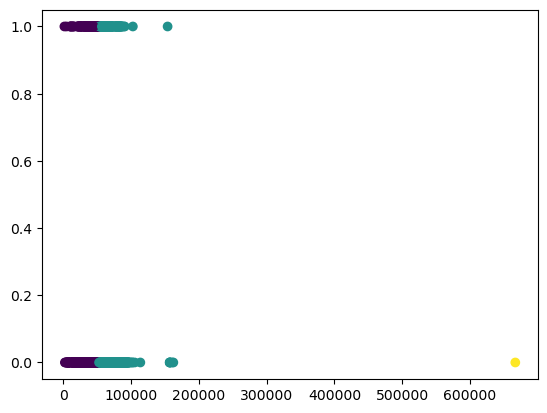

In [33]:
for pair_obj in sorted_pairs[:15]:
    plt.scatter(X[pair_obj["pair"][0]], X[pair_obj["pair"][1]], c=labels)
    plt.show()

I tried to find the best pairs for visualisation, but it seems like kmeans coludnt find good clasters

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.shape)
print(X.shape)

display(X_scaled)
display(X)

(2216, 45)
(2216, 45)


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Year,Month,Day,DayOfWeek,DayOfYear,WeekOfYear,Quarter
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,-0.590553,-0.188452,-0.030056,-1.500343,0.726501,-1.326742,-0.995839,0.624896,0.641061,0.457909
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.590553,-0.188452,-0.030056,1.417393,-0.993199,-0.871342,1.008502,-1.071436,-1.074549,-1.305299
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,1.693329,-0.188452,-0.030056,-0.041475,0.439884,0.608707,-0.494754,0.484316,0.509091,0.457909
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,1.693329,-0.188452,-0.030056,1.417393,-1.279816,-0.643643,-1.496924,-1.315107,-1.272504,-1.305299
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-0.590553,-0.188452,-0.030056,1.417393,-1.566433,0.381007,1.509587,-1.521291,-1.536443,-1.305299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.151917,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,...,-0.590553,-0.188452,-0.030056,-0.041475,-0.133349,-0.302093,0.006331,-0.162352,-0.150759,-0.423695
2212,-1.904422,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,...,1.693329,-0.188452,-0.030056,1.417393,-0.133349,-0.643643,-0.995839,-0.190468,-0.150759,-0.423695
2213,1.016420,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,...,-0.590553,-0.188452,-0.030056,1.417393,-1.566433,1.064106,1.008502,-1.465059,-1.470458,-1.305299
2214,-1.069896,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,...,1.693329,-0.188452,-0.030056,1.417393,-1.566433,0.950256,0.507417,-1.474431,-1.470458,-1.305299


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Year,Month,Day,DayOfWeek,DayOfYear,WeekOfYear,Quarter
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,2012,9,4,1,248,36,3
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,2014,3,8,5,67,10,1
2,1965,71613.0,0,0,26,426,49,127,111,21,...,1,0,0,2013,8,21,2,233,34,3
3,1984,26646.0,1,0,26,11,4,20,10,3,...,1,0,0,2014,2,10,0,41,7,1
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,2014,1,19,6,19,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,2013,6,13,3,164,24,2
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,1,0,0,2014,6,10,1,161,24,2
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,2014,1,25,5,25,4,1
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,1,0,0,2014,1,24,4,24,4,1


In [37]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_scaled)

labels = kmeans.predict(X_scaled)

In [38]:
s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.12


I am not sure if this should help but for me scaling made things only worse

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [64]:
Q1 = X.quantile(0.15)
Q3 = X.quantile(0.85)
IQR = Q3 - Q1

# Filter out the outliers
X_cleaned = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

print(X_cleaned.shape)

(1211, 45)


**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

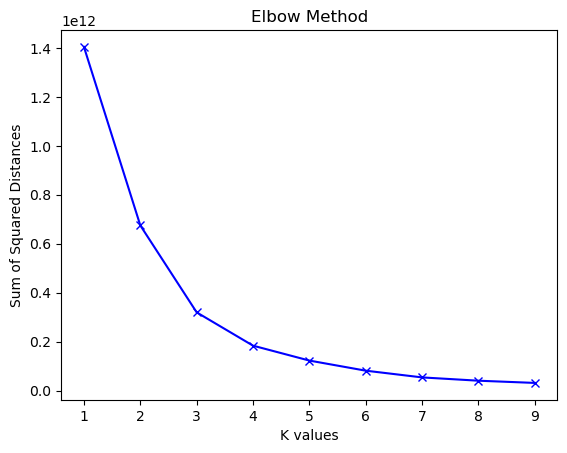

In [65]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

I don't see the elbow here, it seems like the plot is pretty smooth, but if i had to choose i would take 4 or 5

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

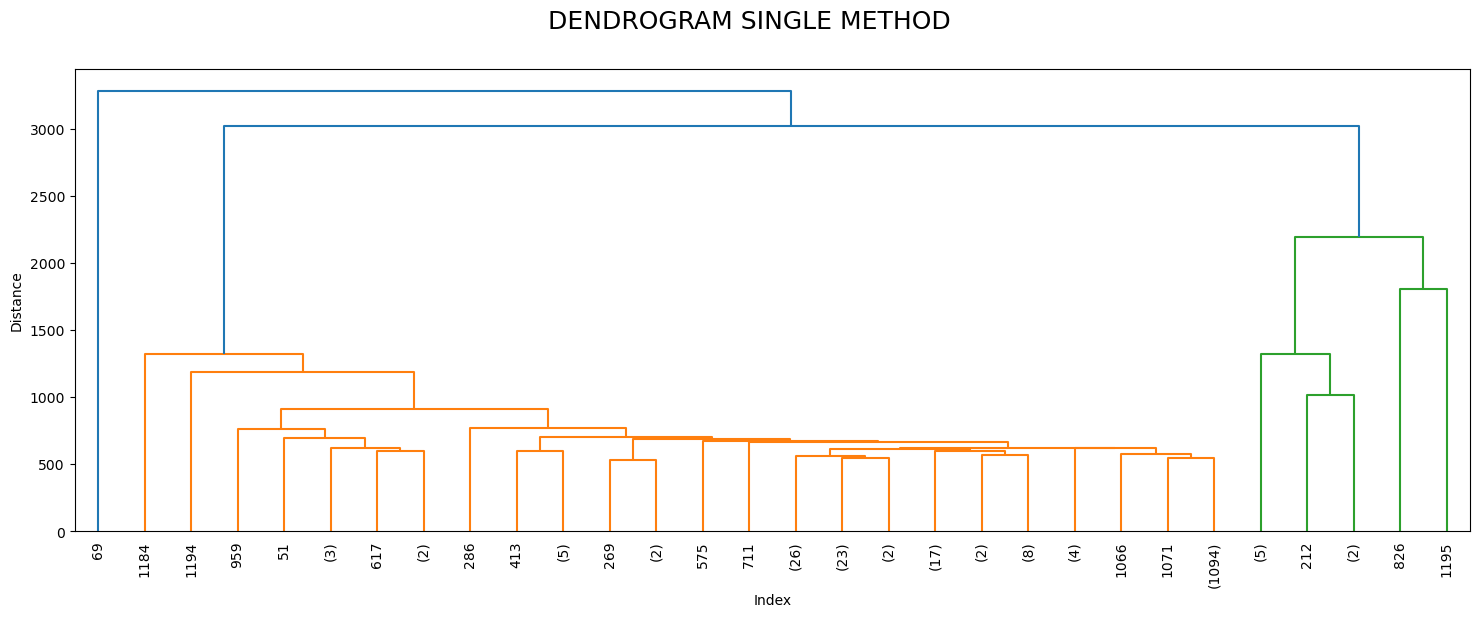

In [74]:
dist_sin = linkage(X_cleaned, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode="lastp")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [69]:
X_cleaned['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_cleaned['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

/var/folders/hh/5x37qck55fv2xxq5_b1z68fr0000gn/T/ipykernel_15138/3108789789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
/var/folders/hh/5x37qck55fv2xxq5_b1z68fr0000gn/T/ipykernel_15138/3108789789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')


In [73]:
s = metrics.silhouette_score(X_cleaned, X_cleaned["2_clust"], metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

s = metrics.silhouette_score(X_cleaned, X_cleaned["3_clust"], metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.44
Silhouette Coefficient for the data Dataset Clusters: 0.20


**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

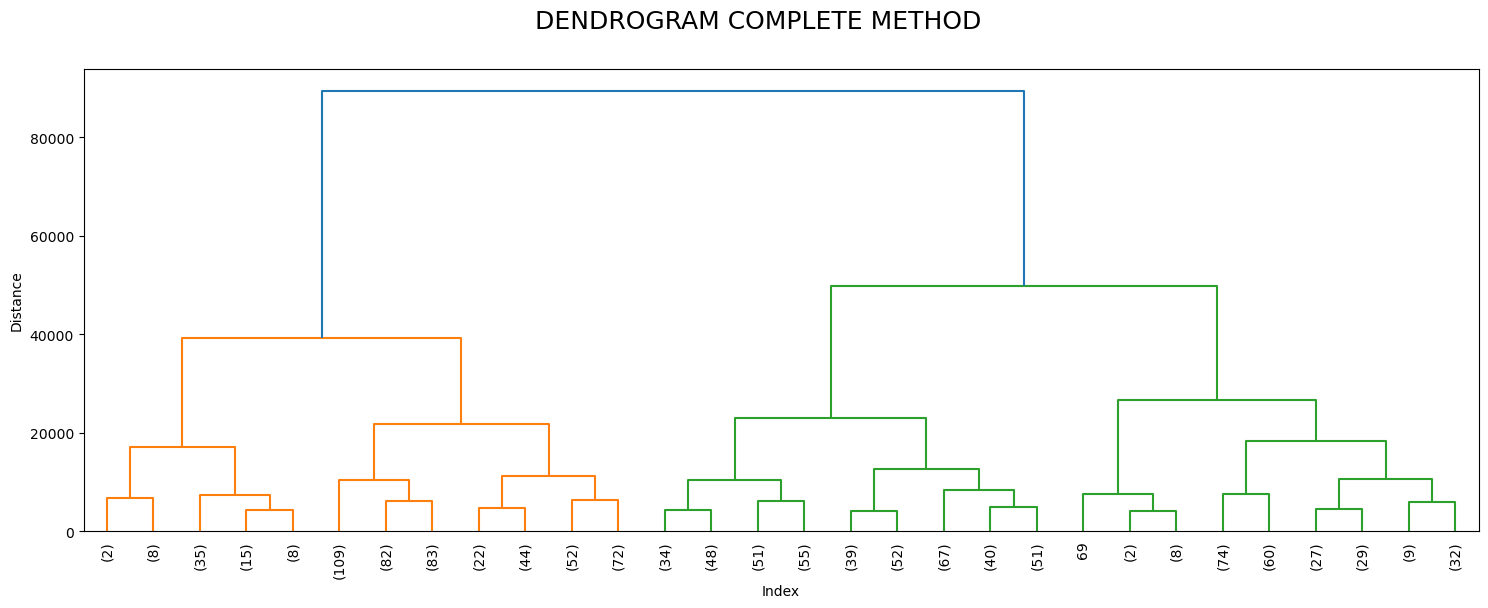

Silhouette Coefficient for the data with complete linkage: 0.58
Silhouette Coefficient for the data with complete linkage: 0.54


/var/folders/hh/5x37qck55fv2xxq5_b1z68fr0000gn/T/ipykernel_15138/613976709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
/var/folders/hh/5x37qck55fv2xxq5_b1z68fr0000gn/T/ipykernel_15138/613976709.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')


In [77]:
dist_sin = linkage(X_cleaned, method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode="lastp")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18)
plt.show()

X_cleaned['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_cleaned['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

s = metrics.silhouette_score(X_cleaned, X_cleaned["2_clust"], metric='euclidean')
print(f'Silhouette Coefficient for the data with complete linkage: {s:.2f}')

s = metrics.silhouette_score(X_cleaned, X_cleaned["3_clust"], metric='euclidean')
print(f'Silhouette Coefficient for the data with complete linkage: {s:.2f}')

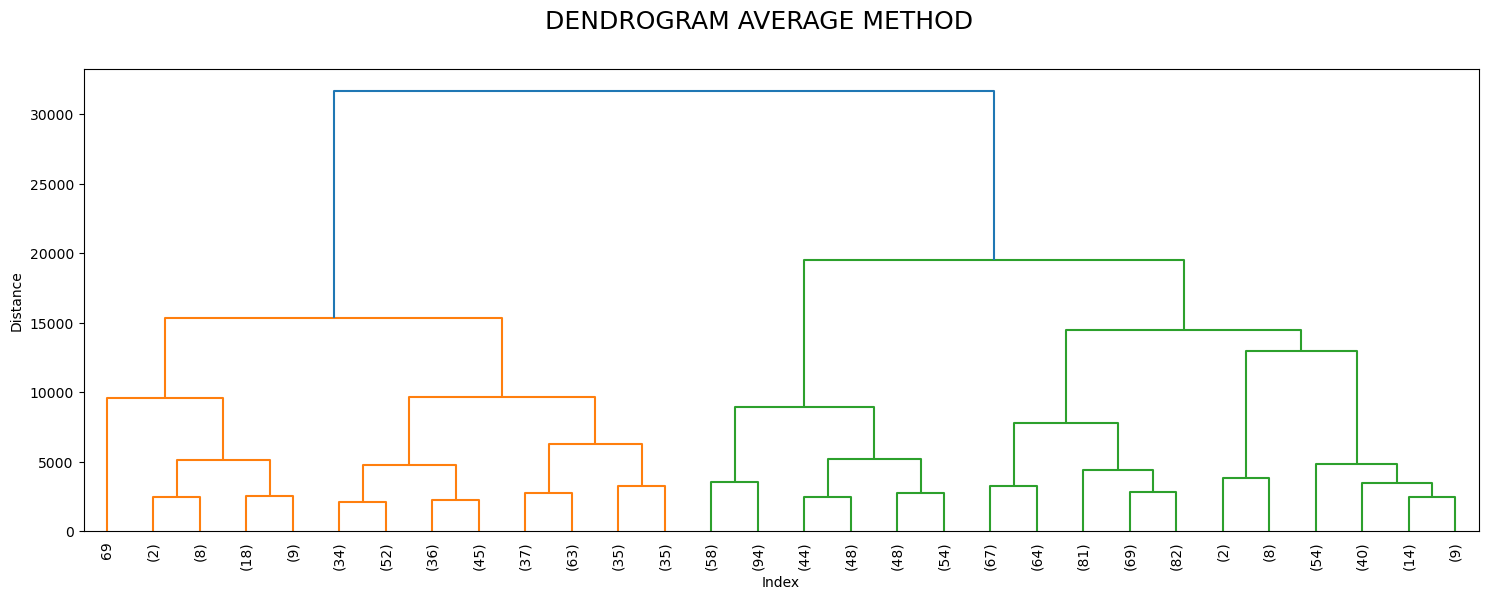

Silhouette Coefficient for the data with average linkage: 0.57
Silhouette Coefficient for the data with average linkage: 0.54


/var/folders/hh/5x37qck55fv2xxq5_b1z68fr0000gn/T/ipykernel_15138/3124017872.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
/var/folders/hh/5x37qck55fv2xxq5_b1z68fr0000gn/T/ipykernel_15138/3124017872.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')


In [79]:
dist_sin = linkage(X_cleaned, method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode="lastp")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM AVERAGE METHOD",fontsize=18)
plt.show()

X_cleaned['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_cleaned['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

s = metrics.silhouette_score(X_cleaned, X_cleaned["2_clust"], metric='euclidean')
print(f'Silhouette Coefficient for the data with average linkage: {s:.2f}')

s = metrics.silhouette_score(X_cleaned, X_cleaned["3_clust"], metric='euclidean')
print(f'Silhouette Coefficient for the data with average linkage: {s:.2f}')

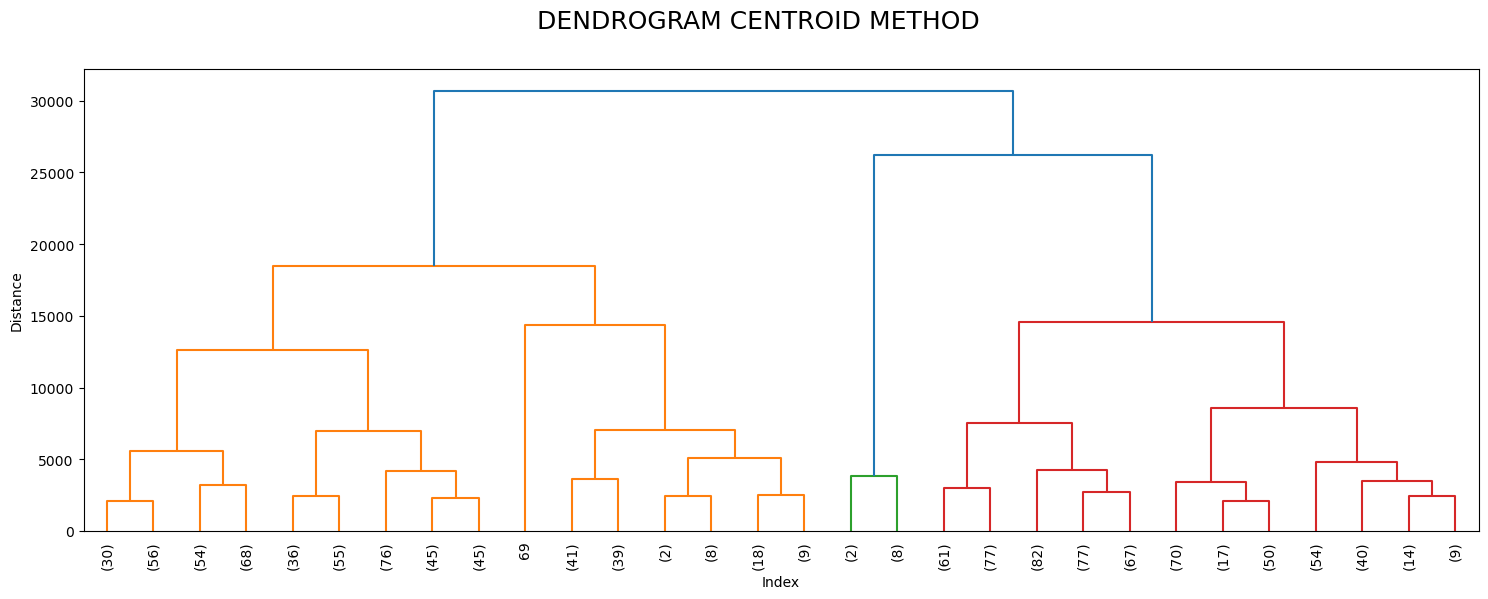

Silhouette Coefficient for the data with centroid linkage: 0.61
Silhouette Coefficient for the data with centroid linkage: 0.53


/var/folders/hh/5x37qck55fv2xxq5_b1z68fr0000gn/T/ipykernel_15138/1982975666.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
/var/folders/hh/5x37qck55fv2xxq5_b1z68fr0000gn/T/ipykernel_15138/1982975666.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')


In [89]:
dist_sin = linkage(X_cleaned, method="centroid")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode="lastp")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM CENTROID METHOD",fontsize=18)
plt.show()

X_cleaned['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_cleaned['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

s = metrics.silhouette_score(X_cleaned, X_cleaned["2_clust"], metric='euclidean')
print(f'Silhouette Coefficient for the data with centroid linkage: {s:.2f}')

s = metrics.silhouette_score(X_cleaned, X_cleaned["3_clust"], metric='euclidean')
print(f'Silhouette Coefficient for the data with centroid linkage: {s:.2f}')

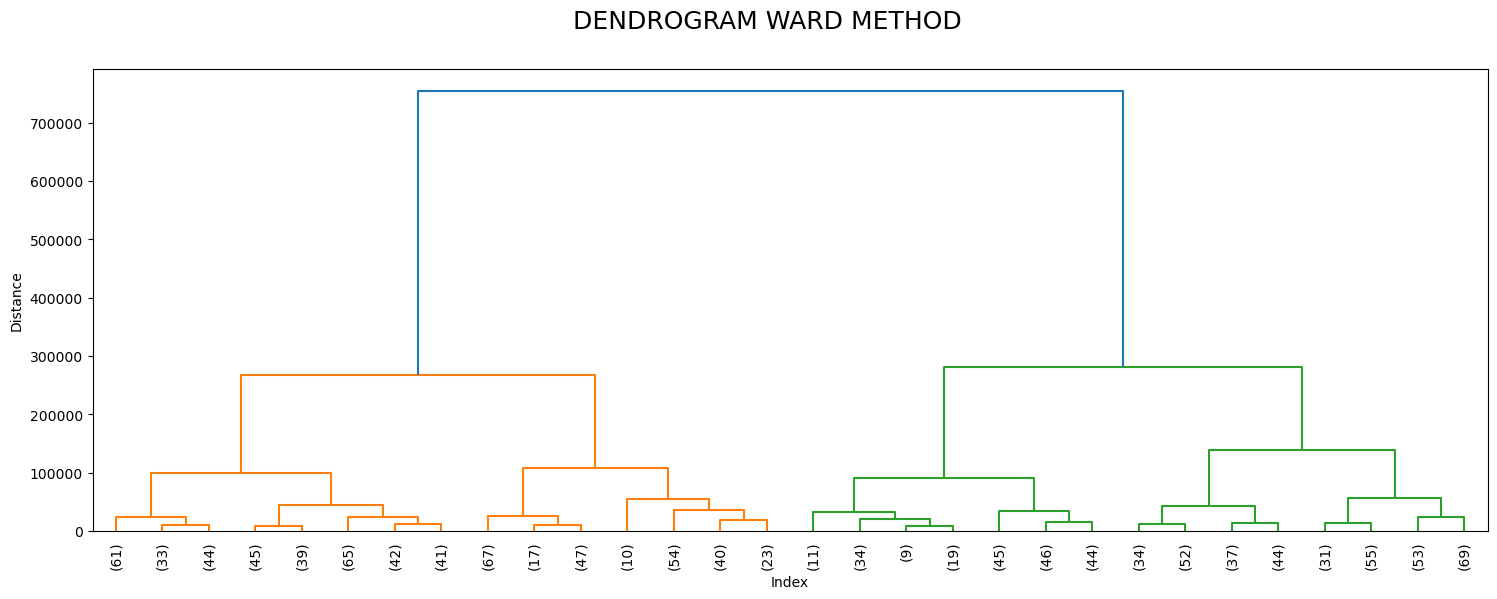

Silhouette Coefficient for the data with ward linkage: 0.61
Silhouette Coefficient for the data with ward linkage: 0.53


/var/folders/hh/5x37qck55fv2xxq5_b1z68fr0000gn/T/ipykernel_15138/1979093681.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
/var/folders/hh/5x37qck55fv2xxq5_b1z68fr0000gn/T/ipykernel_15138/1979093681.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')


In [90]:
dist_sin = linkage(X_cleaned, method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode="lastp")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM WARD METHOD",fontsize=18)
plt.show()

X_cleaned['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_cleaned['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

s = metrics.silhouette_score(X_cleaned, X_cleaned["2_clust"], metric='euclidean')
print(f'Silhouette Coefficient for the data with ward linkage: {s:.2f}')

s = metrics.silhouette_score(X_cleaned, X_cleaned["3_clust"], metric='euclidean')
print(f'Silhouette Coefficient for the data with ward linkage: {s:.2f}')

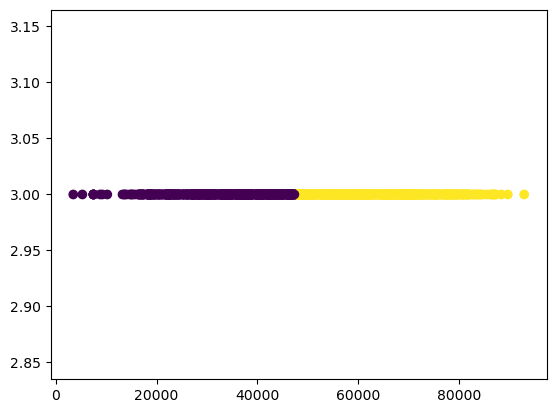

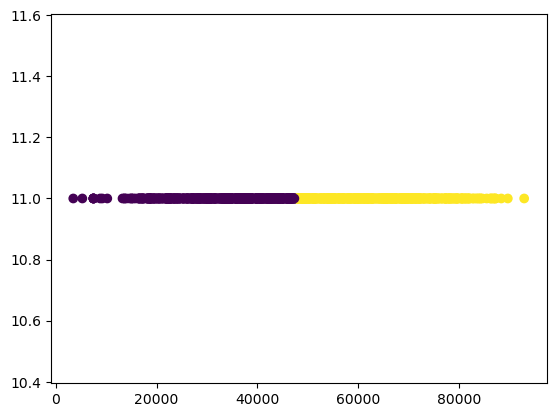

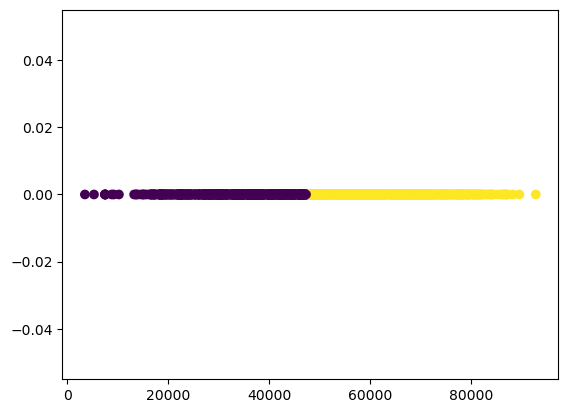

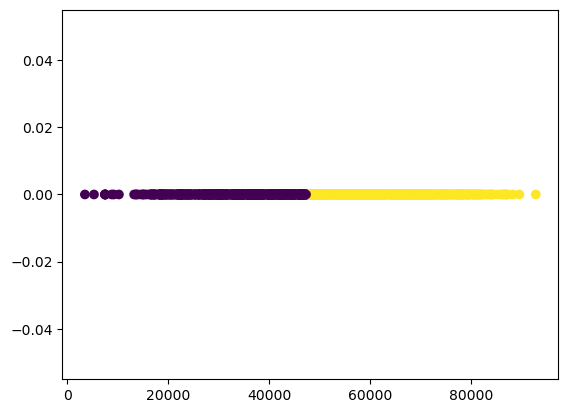

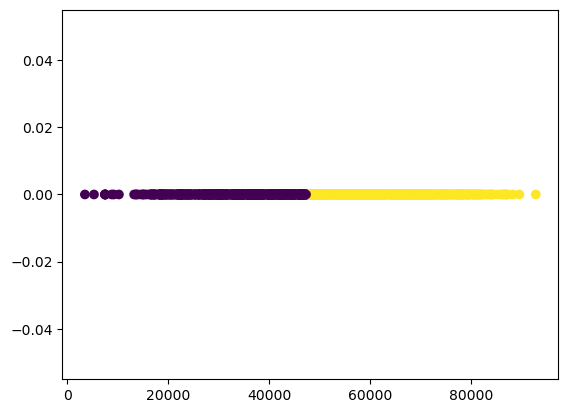

In [93]:
pairs_metrics = find_pairs(X_cleaned, X_cleaned.columns, X_cleaned["2_clust"])

for pair_obj in sorted_pairs[:5]:
    plt.scatter(X_cleaned[pair_obj["pair"][0]], X_cleaned[pair_obj["pair"][1]], c=X_cleaned["2_clust"])
    plt.show()

Not sure if the visualisation is giving a lot of information, but the score for 2 classes is around 0.61 which is not too bad